In [72]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [73]:
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y_pred = tf.nn.softmax( tf.matmul(x,W) + b )

cross_entropy = tf.reduce_mean( -tf.reduce_sum( y* tf.log(y_pred), reduction_indices=[1] ) )
optimizer = tf.train.GradientDescentOptimizer(0.05)
train_step = optimizer.minimize(cross_entropy) 

# 1# For Beginner 
We find the accuracy for testing data

In [69]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
correct_pred = tf.equal(tf.argmax(y,1),tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))
for _ in range(10000):
    batch_xs, batch_ys = data.train.next_batch(100)
    training_data = {x: batch_xs, y: batch_ys}
    sess.run(train_step, feed_dict=training_data)

print('Testing Accuracy:',sess.run(accuracy,feed_dict={x:data.test.images,y:data.test.labels}))

Testing Accuracy: 0.9213


# 2# Better visualization 
Here we can see the improvement of accuray and cross_entropy as we train more data 

In [79]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
correct_pred = tf.equal(tf.argmax(y,1),tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

# train data
training_acc = []
training_ce = []
test_acc = []
test_ce = []
for _ in range(10000):
    batch_xs, batch_ys = data.train.next_batch(100)
  
    training_data = {x: batch_xs, y: batch_ys}
    _,acc,ce = sess.run([train_step,accuracy,cross_entropy], feed_dict=training_data)
    training_acc.append(acc)
    training_ce.append(ce)
    
    test_data = {x:data.test.images,y:data.test.labels}
    acc2,ce2 = sess.run([accuracy,cross_entropy],feed_dict=test_data)
    test_acc.append(acc2)
    test_ce.append(ce2)

"\n# find test accuracy\ntest_data = {x:data.test.images,y:data.test.labels}\ntest_acc,test_ce = sess.run([accuracy,cross_entropy],feed_dict=test_data)\nprint('Testing Accuracy:\t',test_acc)\nprint('Testing Cross Entropy:\t',test_ce)\n"

In [84]:
test_data = {x:data.test.images,y:data.test.labels}
test_accuracy,test_crossentropy = sess.run([accuracy,cross_entropy],feed_dict=test_data)
print('Testing Accuracy:\t',test_accuracy)
print('Testing Cross Entropy:\t',test_crossentropy)

Testing Accuracy:	 0.9215
Testing Cross Entropy:	 0.280635


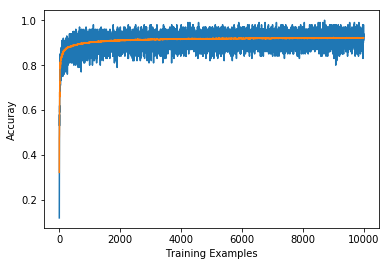

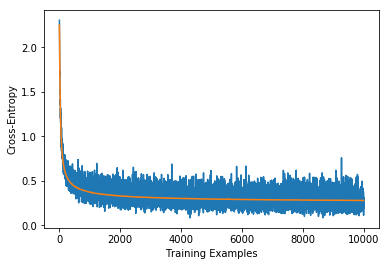

In [81]:
import matplotlib.pyplot as plt
plt.plot(training_acc)
plt.plot(test_acc)
plt.xlabel('Training Examples')
plt.ylabel('Accuray')
plt.show()

plt.plot(training_ce)
plt.plot(test_ce)
plt.xlabel('Training Examples')
plt.ylabel('Cross-Entropy')
plt.show()



0.92150003